# ***Python Base. Функции. Домашнее задание (HW)***
*Алмазова Е.А.*

Используя библиотеку kaggle-environments, реализующую функционал взаимодействия между виртуальными агентами в рамках нескольких популярных игр, реализовать самостоятельно несколько агентов и сравнить их в игре «камень-ножницы-бумага».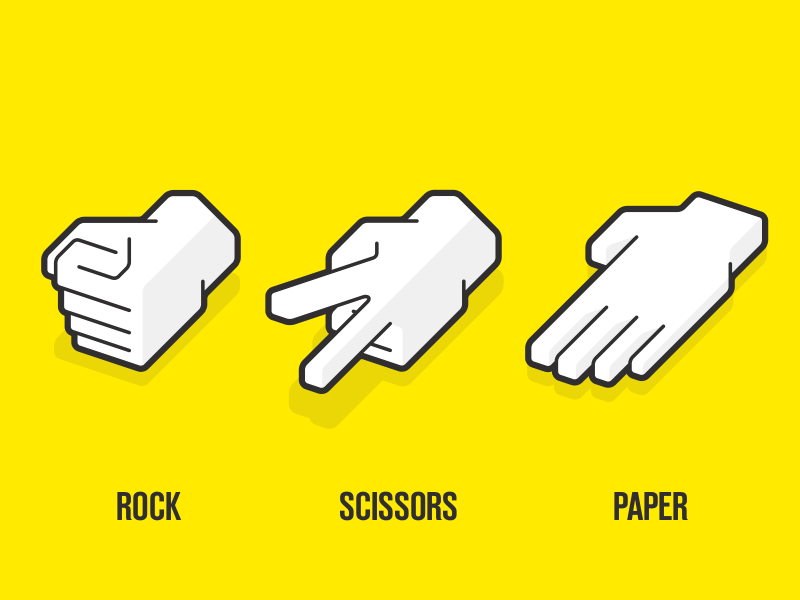


In [1]:
!pip install -q -U kaggle_environments

     |████████████████████████████████| 1.9 MB 5.0 MB/s 
     |████████████████████████████████| 62 kB 959 kB/s 


In [2]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

# 1. Всегда "камень":

In [45]:
%%writefile rock_agent.py
#0 - rock
#1 - paper
#2 - scissors
def rock_agent(observation, configuration):
    return 0

Overwriting rock_agent.py


In [46]:
evaluate(
    "rps", #environment to use - no need to change
    ["rock_agent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-98.0, 98.0]]

# 2. Всегда "бумага":

In [47]:
%%writefile paper_agent.py

def paper_agent(observation, configuration):
    return 1

Overwriting paper_agent.py


In [48]:
evaluate(
    "rps", #environment to use - no need to change
    ["paper_agent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes 
)

[[-97.0, 97.0]]

# 3. Всегда "ножницы":

In [49]:
%%writefile scissors_agent.py

def scissors_agent(observation, configuration):
    return 2

Overwriting scissors_agent.py


In [50]:
evaluate(
    "rps", #environment to use - no need to change
    ["scissors_agent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-99.0, 99.0]]

# 4. Копирует предыдущий ход оппонента:

In [51]:
%%writefile copy_opponent.py

import random

def copy_opponent(observation, configuration):
    if observation.step > 0:
        return observation.lastOpponentAction
    else:
        return random.randrange(0, configuration.signs)

Overwriting copy_opponent.py


In [52]:
evaluate(
    "rps", #environment to use - no need to change
    ["copy_opponent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-22.0, 22.0]]

# 5. Рандомный ход:

In [53]:
%%writefile random_opponent.py

import random

def random_opponent(observation, configuration):
    return random.randrange(0, configuration.signs)

Overwriting random_opponent.py


In [54]:
evaluate(
    "rps", #environment to use - no need to change
    ["random_opponent.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[0, 0]]

# 6. Всегда не "бумага":




In [55]:
%%writefile not_paper.py

import random

def not_paper(observation, configuration):
    return random.randrange(0, configuration.signs, 2)

Overwriting not_paper.py


In [56]:
evaluate(
    "rps", #environment to use - no need to change
    ["not_paper.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-53.0, 53.0]]

# 7. Всегда не "камень":




In [57]:
%%writefile not_rock.py

import random

def not_rock(observation, configuration):
    return random.randrange(1, configuration.signs)

Overwriting not_rock.py


In [58]:
evaluate(
    "rps", #environment to use - no need to change
    ["not_rock.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-31.0, 31.0]]

# 8. Всегда не "ножницы":

In [59]:
%%writefile not_scissors.py

import random

def not_scissors(observation, configuration):
    return random.randrange(0, configuration.signs - 1)

Overwriting not_scissors.py


In [60]:
evaluate(
    "rps", #environment to use - no need to change
    ["not_scissors.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-32.0, 32.0]]

# 9. +1 к предыдущему ходу оппонента:

In [61]:
%%writefile copy_opponent_plus.py

import random

def copy_opponent_plus(observation, configuration):
    if observation.step > 0: return (observation.lastOpponentAction + 1) % configuration.signs
    return random.randrange(0, configuration.signs)

Overwriting copy_opponent_plus.py


In [62]:
evaluate(
    "rps", #environment to use - no need to change
    ["copy_opponent_plus.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[59.0, -59.0]]

# 10. -1 к предыдущему ходу оппонента:

In [63]:
%%writefile copy_opponent_minus.py

import random

def copy_opponent_minus(observation, configuration):
    if observation.step > 0: return (observation.lastOpponentAction + 2) % configuration.signs
    return random.randrange(0, configuration.signs)

Overwriting copy_opponent_minus.py


In [64]:
evaluate(
    "rps", #environment to use - no need to change
    ["copy_opponent_minus.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-96.0, 96.0]]

# 11. Меняет выбор при проигрыше:

In [65]:
%%writefile change_lose_action.py

import random

change_lose_action = None
def change_if_lose(observation, configuration):
    global change_lose_action
    if observation.step == 0:
        change_lose_action = random.randrange(0, configuration.signs)
    elif (observation.lastOpponentAction - change_lose_action) in [-2, 0, 1]:
        change_lose_action = (observation.lastOpponentAction + 1) % configuration.signs
    return change_lose_action

Overwriting change_lose_action.py


In [66]:
evaluate(
    "rps", #environment to use - no need to change
    ["change_lose_action.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[59.0, -59.0]]

# 12. Меняет выбор при выигрыше:

In [67]:
%%writefile change_win_action.py

import random

change_win_action = None
def change_if_win(observation, configuration):
    global change_win_action
    if observation.step == 0:
        change_win_action = random.randrange(0, configuration.signs)
    elif (observation.lastOpponentAction - change_win_action) in [-1, 2]:
        change_win_action = (observation.lastOpponentAction + 1) % configuration.signs
    return change_win_action


Overwriting change_win_action.py


In [68]:
evaluate(
    "rps", #environment to use - no need to change
    ["change_win_action.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[-99.0, 99.0]]

# 13. Камень, ножницы, бумага поочередно:

In [72]:
%%writefile rps_line.py

counter = -1

def rps_line(observation, configuration):
    global counter
    counter += 1
    if counter % 3 == 0:
        return 0
    elif counter % 3 == 1:
        return 1
    else:
        return 2

Overwriting rps_line.py


In [74]:
evaluate(
    "rps", #environment to use - no need to change
    ["rps_line.py", "statistical"], #agents to evaluate
    configuration={"episodeSteps": 100}, #number of episodes
)

[[0, 0]]

# **Турнир:**

In [75]:
agents = ['rock_agent.py',
          'paper_agent.py',
          'scissors_agent.py',
          'copy_opponent.py',
          'random_opponent.py',
          'not_paper.py',
          'not_rock.py',
          'not_scissors.py', 
          'copy_opponent_plus.py', 
          'copy_opponent_minus.py', 
          'change_lose_action.py', 
          'change_win_action.py', 
          'rps_line.py']


rank = {agent: 0 for agent in agents}

for times in range(3):
# сколько раундов сыграет каждая пара
          
    for i in range(len(agents)):
        for j in range(i+1, len(agents)):
            e = evaluate(
            "rps", #environment to use - no need to change
            [agents[i], agents[j]], #agents to evaluate
            configuration={"episodeSteps": 100, 'tieRewardThreshold': 1} #number of episodes 
            )
            if e[0][0] > e[0][1]:
                rank[agents[i]] += 1
            elif e[0][0] < e[0][1]:
                rank[agents[j]] += 1
            

# **Итоги:**

In [77]:
rank_se = pd.Series(rank, name="Рейтинг турнира по количеству выигрышей").sort_values(ascending=False).to_frame()
rank_se

,Рейтинг турнира по количеству выигрышей
change_lose_action.py,29
copy_opponent_plus.py,26
random_opponent.py,21
not_scissors.py,18
not_paper.py,17
not_rock.py,16
paper_agent.py,13
scissors_agent.py,13
change_win_action.py,13
copy_opponent.py,12


Таким образом, лучшей стала стратегия *change_lose_action*, в то время как тактика поочередного использования *камень-ножницы-бумага* стала худшей. Стоит отметить высокие показатели тактики рандомного хода в отличие от тактик стабильного хода ножницами, камнем или бумагой, результаты которых оказались ниже среднего уровня.